# Face Generation
In this project, you'll use generative adversarial networks to generate new images of faces.
### Get the Data
You'll be using two datasets in this project:
- MNIST
- CelebA

Since the celebA dataset is complex and you're doing GANs in a project for the first time, we want you to test your neural network on MNIST before CelebA.  Running the GANs on MNIST will allow you to see how well your model trains sooner.

If you're using [FloydHub](https://www.floydhub.com/), set `data_dir` to "/input" and use the [FloydHub data ID](http://docs.floydhub.com/home/using_datasets/) "R5KrjnANiKVhLWAkpXhNBe".

In [1]:
!pip install -U tensorflow==1.1 #MP To remove Tensorflow errors from using version 1.3
#!pip uninstall matplotlib
!pip install -U matplotlib==2.0.2 #MP To solve error prob: AttributeError: 'numpy.ndarray' object has no attribute 'mask'

Requirement already up-to-date: tensorflow==1.1 in /home/michael/anaconda3/envs/face-gen/lib/python3.6/site-packages
Requirement already up-to-date: six>=1.10.0 in /home/michael/anaconda3/envs/face-gen/lib/python3.6/site-packages (from tensorflow==1.1)
Requirement already up-to-date: protobuf>=3.2.0 in /home/michael/anaconda3/envs/face-gen/lib/python3.6/site-packages (from tensorflow==1.1)
Requirement already up-to-date: werkzeug>=0.11.10 in /home/michael/anaconda3/envs/face-gen/lib/python3.6/site-packages (from tensorflow==1.1)
Requirement already up-to-date: wheel>=0.26 in /home/michael/anaconda3/envs/face-gen/lib/python3.6/site-packages (from tensorflow==1.1)
Requirement already up-to-date: numpy>=1.11.0 in /home/michael/anaconda3/envs/face-gen/lib/python3.6/site-packages (from tensorflow==1.1)
Requirement already up-to-date: setuptools in /home/michael/anaconda3/envs/face-gen/lib/python3.6/site-packages (from protobuf>=3.2.0->tensorflow==1.1)
Requirement already up-to-date: matplot

In [2]:
data_dir = './data'

# FloydHub - Use with data ID "R5KrjnANiKVhLWAkpXhNBe"
#data_dir = '/input'


"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
import helper

helper.download_extract('mnist', data_dir)
helper.download_extract('celeba', data_dir)

Found mnist Data
Found celeba Data


## Explore the Data
### MNIST
As you're aware, the [MNIST](http://yann.lecun.com/exdb/mnist/) dataset contains images of handwritten digits. You can view the first number of examples by changing `show_n_images`. 

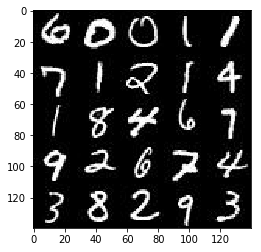

In [3]:
show_n_images = 25

"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
%matplotlib inline
import os
from glob import glob
from matplotlib import pyplot

mnist_images = helper.get_batch(glob(os.path.join(data_dir, 'mnist/*.jpg'))[:show_n_images], 28, 28, 'L')
pyplot.imshow(helper.images_square_grid(mnist_images, 'L'), cmap='gray')

### CelebA
The [CelebFaces Attributes Dataset (CelebA)](http://mmlab.ie.cuhk.edu.hk/projects/CelebA.html) dataset contains over 200,000 celebrity images with annotations.  Since you're going to be generating faces, you won't need the annotations.  You can view the first number of examples by changing `show_n_images`.

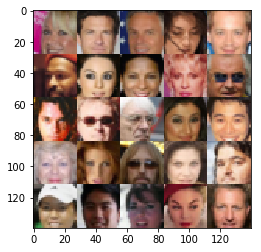

In [4]:
show_n_images = 25

"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
mnist_images = helper.get_batch(glob(os.path.join(data_dir, 'img_align_celeba/*.jpg'))[:show_n_images], 28, 28, 'RGB')
pyplot.imshow(helper.images_square_grid(mnist_images, 'RGB'))

## Preprocess the Data
Since the project's main focus is on building the GANs, we'll preprocess the data for you.  The values of the MNIST and CelebA dataset will be in the range of -0.5 to 0.5 of 28x28 dimensional images.  The CelebA images will be cropped to remove parts of the image that don't include a face, then resized down to 28x28.

The MNIST images are black and white images with a single [color channel](https://en.wikipedia.org/wiki/Channel_(digital_image%29) while the CelebA images have [3 color channels (RGB color channel)](https://en.wikipedia.org/wiki/Channel_(digital_image%29#RGB_Images).
## Build the Neural Network
You'll build the components necessary to build a GANs by implementing the following functions below:
- `model_inputs`
- `discriminator`
- `generator`
- `model_loss`
- `model_opt`
- `train`

### Check the Version of TensorFlow and Access to GPU
This will check to make sure you have the correct version of TensorFlow and access to a GPU

In [5]:
"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
from distutils.version import LooseVersion
import warnings
import tensorflow as tf

# Check TensorFlow Version
assert LooseVersion(tf.__version__) >= LooseVersion('1.0'), 'Please use TensorFlow version 1.0 or newer.  You are using {}'.format(tf.__version__)
print('TensorFlow Version: {}'.format(tf.__version__))

# Check for a GPU
if not tf.test.gpu_device_name():
    warnings.warn('No GPU found. Please use a GPU to train your neural network.')
else:
    print('Default GPU Device: {}'.format(tf.test.gpu_device_name()))

TensorFlow Version: 1.1.0


/home/michael/anaconda3/envs/face-gen/lib/python3.6/site-packages/ipykernel_launcher.py:14: UserWarning: No GPU found. Please use a GPU to train your neural network.
  


### Input
Implement the `model_inputs` function to create TF Placeholders for the Neural Network. It should create the following placeholders:
- Real input images placeholder with rank 4 using `image_width`, `image_height`, and `image_channels`.
- Z input placeholder with rank 2 using `z_dim`.
- Learning rate placeholder with rank 0.

Return the placeholders in the following the tuple (tensor of real input images, tensor of z data)

In [6]:
import problem_unittests as tests

def model_inputs(image_width, image_height, image_channels, z_dim):
    """
    Create the model inputs
    :param image_width: The input image width
    :param image_height: The input image height
    :param image_channels: The number of image channels
    :param z_dim: The dimension of Z
    :return: Tuple of (tensor of real input images, tensor of z data, learning rate)
    """
    #1-8 TODO: Implement Function
    
    inputs_real = tf.placeholder(tf.float32, (None, image_width, image_height, image_channels), name='input_real')
    inputs_z = tf.placeholder(tf.float32, (None, z_dim), name='input_z')
    learn_rate = tf.placeholder(tf.float32, name='learn_rate')
    return inputs_real, inputs_z, learn_rate
 
    
"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_model_inputs(model_inputs)

Tests Passed


### Discriminator
Implement `discriminator` to create a discriminator neural network that discriminates on `images`.  This function should be able to reuse the variables in the neural network.  Use [`tf.variable_scope`](https://www.tensorflow.org/api_docs/python/tf/variable_scope) with a scope name of "discriminator" to allow the variables to be reused.  The function should return a tuple of (tensor output of the discriminator, tensor logits of the discriminator).

In [7]:
def discriminator(images, reuse=False):
    """
    Create the discriminator network
    :param images: Tensor of input image(s)
    :param reuse: Boolean if the weights should be reused
    :return: Tuple of (tensor output of the discriminator, tensor logits of the discriminator)
    """
    #2-1 TODO: Implement Function

    with tf.variable_scope('discriminator', reuse=reuse):
        
        alpha = 0.2
        
        #XAVIER INITIALIZATION: - tf.contrib.layers.conv2d uses Xavier weight initialization by default
        
        #First convolutional layer
        j1 = tf.contrib.layers.conv2d(images, 64, 5, 2, 'same')
        j1 = tf.maximum(alpha * j1, j1)
        
        #Second convolutional layer
        j2 = tf.contrib.layers.conv2d(j1, 128, 5, 2, 'same')
        j2 = tf.layers.batch_normalization(j2, training=True)
        j2 = tf.maximum(alpha * j2, j2)
        
        #Third convolutional layer
        j3 = tf.contrib.layers.conv2d(j2, 256, 5, 2, 'same')
        j3 = tf.layers.batch_normalization(j3, training=True)
        j3 = tf.maximum(alpha * j3, j3)
        
        #Fourth convolutional layer
        j4 = tf.contrib.layers.conv2d(j3, 512, 5, 2, 'same')
        j4 = tf.layers.batch_normalization(j3, training=True)
        j4 = tf.maximum(alpha * j4, j4)
        
        #Output fully connected layer
        flat = tf.reshape(j4, (-1, 4*4*512))
        logits = tf.layers.dense(flat, 1)
        
        #Apply dropout:  Decreases probability that discriminator learns data distribution
        logits = tf.layers.dropout(logits, rate=0.5)
        
        out = tf.sigmoid(logits)
        
        
    return out, logits
    

"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_discriminator(discriminator, tf)

Tests Passed


### Generator
Implement `generator` to generate an image using `z`. This function should be able to reuse the variables in the neural network.  Use [`tf.variable_scope`](https://www.tensorflow.org/api_docs/python/tf/variable_scope) with a scope name of "generator" to allow the variables to be reused. The function should return the generated 28 x 28 x `out_channel_dim` images.

In [8]:
def generator(z, out_channel_dim, is_train=True):
    """
    Create the generator network
    :param z: Input z
    :param out_channel_dim: The number of channels in the output image
    :param is_train: Boolean if generator is being used for training
    :return: The tensor output of the generator
    """
    #3-8 TODO: Implement Function
    
    
    with tf.variable_scope('generator', reuse=not (is_train)):
        alpha = 0.2
        keep_prob=0.5
        
        # Input fully connected layer
        fcl = tf.layers.dense(z, 7*7*512)
        # Reshape
        fcl = tf.reshape(fcl, (-1, 7, 7, 512))
        # x1 = tf.layers.batch_normalization(x1, training=is_train)
        fcl = tf.maximum(alpha * fcl, fcl)
        #7*7*512
        
        #XAVIER INITIALIZATION: - tf.layers.conv2d_transpose uses Xavier weight initialization by default
        
        #First convolutional layer
        x1 = tf.layers.conv2d_transpose(fcl, 256, 5, strides=1, padding='same')
        x1 = tf.layers.batch_normalization(x1, training=is_train)
        x1 = tf.maximum(alpha * x1, x1)
        #Dropout
        x1 = tf.nn.dropout(x1,keep_prob=keep_prob)
        #7*7*256
        
        #Second convolutional layer
        x2 = tf.layers.conv2d_transpose(x1, 128, 5, strides=2, padding='same')
        x2 = tf.layers.batch_normalization(x2, training=is_train)
        x2 = tf.maximum(alpha * x2, x2)
        #Dropout
        x2 = tf.nn.dropout(x2,keep_prob=keep_prob)
        #14*14*128
        
        #Third convolutional layer   MP-v3 added this layer
        x3 = tf.layers.conv2d_transpose(x2, 64, 5, strides=2, padding='same') 
        x3 = tf.layers.batch_normalization(x3, training=is_train)
        x3 = tf.maximum(alpha * x3, x3)
        #Dropout
        x3 = tf.nn.dropout(x3,keep_prob=keep_prob)
        #28*28*64
        
        #Fourth convolutional layer   MP-v3 added this layer
        x4 = tf.layers.conv2d_transpose(x3, 32, 5, strides=2, padding='same') 
        x4 = tf.layers.batch_normalization(x4, training=is_train)
        x4 = tf.maximum(alpha * x4, x4)
        #Dropout
        x4 = tf.nn.dropout(x4,keep_prob=keep_prob)        
        #56*56*32
        
        # OutputL
        logits = tf.layers.conv2d_transpose(x2, out_channel_dim, 5, strides=2, padding='same')
        #128*128*out_channel_dim  MP-v3 changed from 56*56*out_channel_dim
        
        #logits = tf.slice(logits, [0, 2, 2, 0], [-1, 128, 128, -1])  MP-V3  Changed from [-1, 56, 56, -1]
        out = tf.tanh(logits)
        
        return out

       
"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_generator(generator, tf)

Tests Passed


### Loss
Implement `model_loss` to build the GANs for training and calculate the loss.  The function should return a tuple of (discriminator loss, generator loss).  Use the following functions you implemented:
- `discriminator(images, reuse=False)`
- `generator(z, out_channel_dim, is_train=True)`

In [9]:
def model_loss(input_real, input_z, out_channel_dim):
    """
    Get the loss for the discriminator and generator
    :param input_real: Images from the real dataset
    :param input_z: Z input
    :param out_channel_dim: The number of channels in the output image
    :return: A tuple of (discriminator loss, generator loss)
    """
    #4 TODO: Implement Function MP4-10
    
    # Implement Function
    label_smoothness = 0.1
    
    g_model = generator(input_z, out_channel_dim, is_train=True)
    d_model_real, d_logits_real = discriminator(input_real, reuse=False)
    d_model_fake, d_logits_fake = discriminator(g_model, reuse=True)

    d_loss_real = tf.reduce_mean(
        tf.nn.sigmoid_cross_entropy_with_logits(logits=d_logits_real, labels=tf.ones_like(d_model_real)*(1-label_smoothness)))
    d_loss_fake = tf.reduce_mean(
        tf.nn.sigmoid_cross_entropy_with_logits(logits=d_logits_fake, labels=tf.zeros_like(d_model_fake)))
    g_loss = tf.reduce_mean(
        tf.nn.sigmoid_cross_entropy_with_logits(logits=d_logits_fake, labels=tf.ones_like(d_model_fake)))

    d_loss = d_loss_real + d_loss_fake

    return d_loss, g_loss

"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_model_loss(model_loss)

Tests Passed


### Optimization
Implement `model_opt` to create the optimization operations for the GANs. Use [`tf.trainable_variables`](https://www.tensorflow.org/api_docs/python/tf/trainable_variables) to get all the trainable variables.  Filter the variables with names that are in the discriminator and generator scope names.  The function should return a tuple of (discriminator training operation, generator training operation).

In [10]:
def model_opt(d_loss, g_loss, learning_rate, beta1):
    """
    Get optimization operations
    :param d_loss: Discriminator loss Tensor
    :param g_loss: Generator loss Tensor
    :param learning_rate: Learning Rate Placeholder
    :param beta1: The exponential decay rate for the 1st moment in the optimizer
    :return: A tuple of (discriminator training operation, generator training operation)
    """
    #5-3 TODO: Implement Function

    # TODO: Implement Function

    # Get discriminator and gen variables
    t_vars = tf.trainable_variables()
    d_vars = [var for var in t_vars if var.name.startswith('discriminator')]
    g_vars = [var for var in t_vars if var.name.startswith('generator')]

    # Run optimizer
    with tf.control_dependencies(tf.get_collection(tf.GraphKeys.UPDATE_OPS)):
        d_train_opt = tf.train.AdamOptimizer(learning_rate, beta1=beta1).minimize(d_loss, var_list=d_vars)
        g_train_opt = tf.train.AdamOptimizer(learning_rate, beta1=beta1).minimize(g_loss, var_list=g_vars)

    return d_train_opt, g_train_opt    


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_model_opt(model_opt, tf)

Tests Passed


## Neural Network Training
### Show Output
Use this function to show the current output of the generator during training. It will help you determine how well the GANs is training.

In [11]:
"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
import numpy as np

def show_generator_output(sess, n_images, input_z, out_channel_dim, image_mode):
    """
    Show example output for the generator
    :param sess: TensorFlow session
    :param n_images: Number of Images to display
    :param input_z: Input Z Tensor
    :param out_channel_dim: The number of channels in the output image
    :param image_mode: The mode to use for images ("RGB" or "L")
    """
    cmap = None if image_mode == 'RGB' else 'gray'
    z_dim = input_z.get_shape().as_list()[-1]
    example_z = np.random.uniform(-1, 1, size=[n_images, z_dim])

    samples = sess.run(
        generator(input_z, out_channel_dim, False),
        feed_dict={input_z: example_z})

    images_grid = helper.images_square_grid(samples, image_mode)
    pyplot.imshow(images_grid, cmap=cmap)
    pyplot.show()

### Train
Implement `train` to build and train the GANs.  Use the following functions you implemented:
- `model_inputs(image_width, image_height, image_channels, z_dim)`
- `model_loss(input_real, input_z, out_channel_dim)`
- `model_opt(d_loss, g_loss, learning_rate, beta1)`

Use the `show_generator_output` to show `generator` output while you train. Running `show_generator_output` for every batch will drastically increase training time and increase the size of the notebook.  It's recommended to print the `generator` output every 100 batches.

In [12]:
def train(epoch_count, batch_size, z_dim, learning_rate, beta1, get_batches, data_shape, data_image_mode):
    """
    Train the GAN
    :param epoch_count: Number of epochs
    :param batch_size: Batch Size
    :param z_dim: Z dimension
    :param learning_rate: Learning Rate
    :param beta1: The exponential decay rate for the 1st moment in the optimizer
    :param get_batches: Function to get batches
    :param data_shape: Shape of the data
    :param data_image_mode: The image mode to use for images ("RGB" or "L")
    """
    #6-9 TODO: Build Model
    
    # Build Model
    n_samples, width, height, channels = data_shape
    input_real, input_z, learn_rate = model_inputs(width, height, channels, z_dim)
    d_loss, g_loss = model_loss(input_real, input_z, channels)
    d_opt, g_opt = model_opt(d_loss, g_loss, learn_rate, beta1)
    
    steps = 0
    show_every = 50
    print_every = 10
    with tf.Session() as sess:
        sess.run(tf.global_variables_initializer())
        for epoch_i in range(epoch_count):
            for batch_images in get_batches(batch_size):
                batch_images *= 2
                # Train Model
                steps += 1
                # Sample random noise for G
                batch_z = np.random.uniform(-1, 1, size=(batch_size, z_dim))

                # Run optimizers
                _ = sess.run(d_opt, feed_dict={input_real: batch_images, input_z: batch_z, learn_rate: learning_rate})
                _ = sess.run(g_opt, feed_dict={input_real: batch_images, input_z: batch_z, learn_rate: learning_rate})

                if steps % show_every == 0:
                    n_images = 16
                    show_generator_output(sess, n_images, input_z, channels, data_image_mode)

                if steps % print_every == 0:
                    train_loss_d = d_loss.eval({input_z: batch_z, input_real: batch_images})
                    train_loss_g = g_loss.eval({input_z: batch_z})

                    print("Epoch {}/{}...".format(epoch_i, epoch_count),
                          "Discriminator Loss: {:.4f}...".format(train_loss_d),
                          "Generator Loss: {:.4f}".format(train_loss_g))
                
                

### MNIST
Test your GANs architecture on MNIST.  After 2 epochs, the GANs should be able to generate images that look like handwritten digits.  Make sure the loss of the generator is lower than the loss of the discriminator or close to 0.

Epoch 0/2... Discriminator Loss: 0.4661... Generator Loss: 3.9151
Epoch 0/2... Discriminator Loss: 0.4229... Generator Loss: 5.2248
Epoch 0/2... Discriminator Loss: 0.4533... Generator Loss: 3.1109
Epoch 0/2... Discriminator Loss: 0.4866... Generator Loss: 2.8372


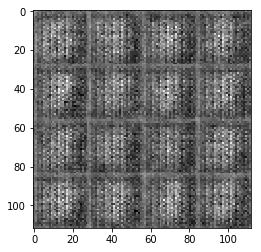

Epoch 0/2... Discriminator Loss: 0.5046... Generator Loss: 3.1343
Epoch 0/2... Discriminator Loss: 0.3779... Generator Loss: 4.0372
Epoch 0/2... Discriminator Loss: 0.4466... Generator Loss: 3.3811
Epoch 0/2... Discriminator Loss: 0.7235... Generator Loss: 5.3331
Epoch 0/2... Discriminator Loss: 0.5737... Generator Loss: 2.8854


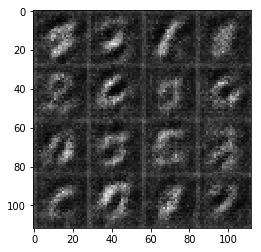

Epoch 0/2... Discriminator Loss: 1.0171... Generator Loss: 1.1348
Epoch 0/2... Discriminator Loss: 0.4640... Generator Loss: 2.9884
Epoch 0/2... Discriminator Loss: 0.5167... Generator Loss: 2.7970
Epoch 0/2... Discriminator Loss: 0.5070... Generator Loss: 3.0806
Epoch 0/2... Discriminator Loss: 0.5516... Generator Loss: 2.2833


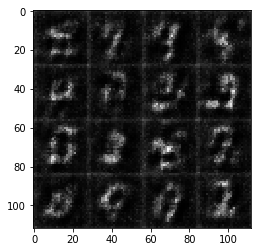

Epoch 0/2... Discriminator Loss: 0.4948... Generator Loss: 3.2615
Epoch 0/2... Discriminator Loss: 0.8548... Generator Loss: 1.2920
Epoch 0/2... Discriminator Loss: 0.5441... Generator Loss: 2.5680
Epoch 0/2... Discriminator Loss: 0.5321... Generator Loss: 2.3375
Epoch 0/2... Discriminator Loss: 0.5666... Generator Loss: 3.5059


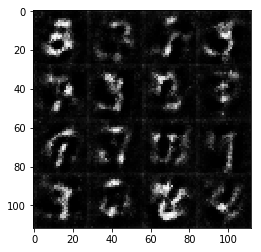

Epoch 0/2... Discriminator Loss: 0.8999... Generator Loss: 1.3591
Epoch 0/2... Discriminator Loss: 0.6614... Generator Loss: 1.8813
Epoch 0/2... Discriminator Loss: 0.5514... Generator Loss: 1.9307
Epoch 0/2... Discriminator Loss: 0.6810... Generator Loss: 1.6912
Epoch 0/2... Discriminator Loss: 0.4002... Generator Loss: 3.2984


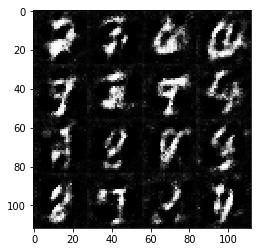

Epoch 0/2... Discriminator Loss: 0.4419... Generator Loss: 3.0780
Epoch 0/2... Discriminator Loss: 0.4481... Generator Loss: 3.9800
Epoch 0/2... Discriminator Loss: 0.5047... Generator Loss: 2.2538
Epoch 0/2... Discriminator Loss: 0.9415... Generator Loss: 1.4464
Epoch 0/2... Discriminator Loss: 1.0185... Generator Loss: 1.1379


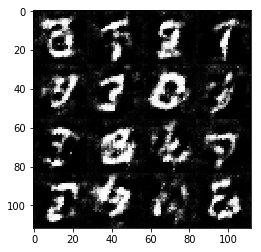

Epoch 0/2... Discriminator Loss: 0.4787... Generator Loss: 2.8705
Epoch 0/2... Discriminator Loss: 0.4752... Generator Loss: 2.8807
Epoch 0/2... Discriminator Loss: 0.8734... Generator Loss: 1.5563
Epoch 0/2... Discriminator Loss: 0.4686... Generator Loss: 2.7644
Epoch 0/2... Discriminator Loss: 0.4604... Generator Loss: 3.3026


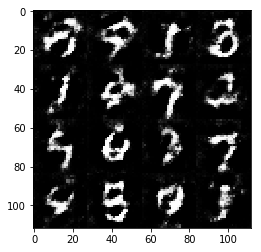

Epoch 0/2... Discriminator Loss: 0.5464... Generator Loss: 2.3081
Epoch 0/2... Discriminator Loss: 0.4809... Generator Loss: 3.2357
Epoch 0/2... Discriminator Loss: 0.4688... Generator Loss: 2.9522
Epoch 0/2... Discriminator Loss: 0.4789... Generator Loss: 2.6106
Epoch 0/2... Discriminator Loss: 0.7795... Generator Loss: 1.6598


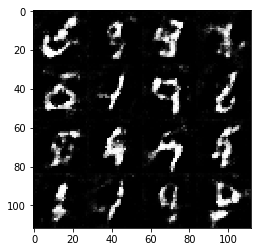

Epoch 0/2... Discriminator Loss: 0.8556... Generator Loss: 1.5287
Epoch 0/2... Discriminator Loss: 0.4537... Generator Loss: 3.3319
Epoch 0/2... Discriminator Loss: 0.6662... Generator Loss: 2.0203
Epoch 0/2... Discriminator Loss: 0.4835... Generator Loss: 2.6435
Epoch 0/2... Discriminator Loss: 0.4286... Generator Loss: 3.6199


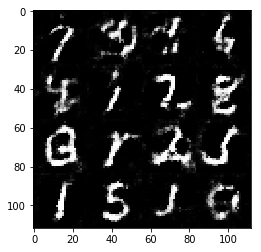

Epoch 0/2... Discriminator Loss: 0.6291... Generator Loss: 4.5910
Epoch 0/2... Discriminator Loss: 0.6079... Generator Loss: 1.7976
Epoch 0/2... Discriminator Loss: 0.4195... Generator Loss: 3.2145
Epoch 0/2... Discriminator Loss: 0.7418... Generator Loss: 1.9163
Epoch 0/2... Discriminator Loss: 0.5384... Generator Loss: 2.0670


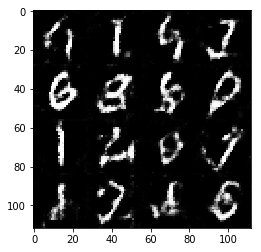

Epoch 0/2... Discriminator Loss: 0.6141... Generator Loss: 2.0500
Epoch 0/2... Discriminator Loss: 0.5781... Generator Loss: 3.5914
Epoch 0/2... Discriminator Loss: 0.4434... Generator Loss: 3.2300
Epoch 0/2... Discriminator Loss: 0.6478... Generator Loss: 1.8328
Epoch 0/2... Discriminator Loss: 0.4753... Generator Loss: 2.4930


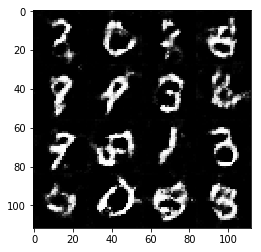

Epoch 0/2... Discriminator Loss: 0.5151... Generator Loss: 3.6641
Epoch 0/2... Discriminator Loss: 1.2142... Generator Loss: 0.9569
Epoch 0/2... Discriminator Loss: 0.5441... Generator Loss: 2.4203
Epoch 0/2... Discriminator Loss: 0.5311... Generator Loss: 2.3855
Epoch 0/2... Discriminator Loss: 0.5072... Generator Loss: 3.3821


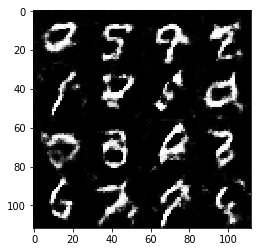

Epoch 0/2... Discriminator Loss: 0.5505... Generator Loss: 2.4425
Epoch 0/2... Discriminator Loss: 0.7091... Generator Loss: 1.7080
Epoch 0/2... Discriminator Loss: 0.5289... Generator Loss: 2.1571
Epoch 0/2... Discriminator Loss: 0.4172... Generator Loss: 3.5530
Epoch 0/2... Discriminator Loss: 1.0093... Generator Loss: 1.5083


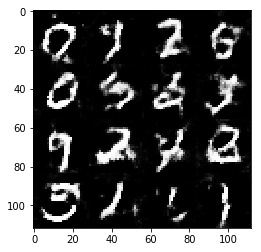

Epoch 0/2... Discriminator Loss: 0.4728... Generator Loss: 3.1892
Epoch 0/2... Discriminator Loss: 0.5785... Generator Loss: 1.8492
Epoch 0/2... Discriminator Loss: 0.5949... Generator Loss: 2.2928
Epoch 0/2... Discriminator Loss: 0.4814... Generator Loss: 2.9849
Epoch 0/2... Discriminator Loss: 0.4363... Generator Loss: 3.3519


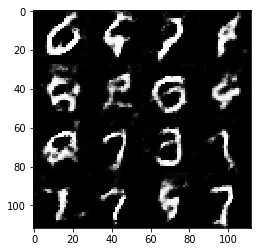

Epoch 0/2... Discriminator Loss: 0.5041... Generator Loss: 2.2593
Epoch 0/2... Discriminator Loss: 0.4497... Generator Loss: 2.8564
Epoch 0/2... Discriminator Loss: 0.4157... Generator Loss: 3.3969
Epoch 0/2... Discriminator Loss: 0.4478... Generator Loss: 2.8908
Epoch 0/2... Discriminator Loss: 0.5603... Generator Loss: 2.0927


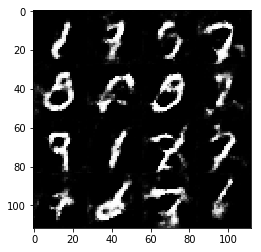

Epoch 0/2... Discriminator Loss: 0.5361... Generator Loss: 2.0542
Epoch 0/2... Discriminator Loss: 0.4740... Generator Loss: 2.6918
Epoch 0/2... Discriminator Loss: 0.6413... Generator Loss: 1.9295
Epoch 0/2... Discriminator Loss: 0.4828... Generator Loss: 3.6784
Epoch 0/2... Discriminator Loss: 0.5597... Generator Loss: 3.1913


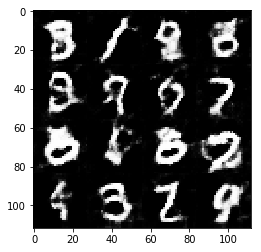

Epoch 0/2... Discriminator Loss: 0.7027... Generator Loss: 1.5751
Epoch 0/2... Discriminator Loss: 0.6132... Generator Loss: 1.9212
Epoch 0/2... Discriminator Loss: 0.5793... Generator Loss: 2.2336
Epoch 0/2... Discriminator Loss: 0.4820... Generator Loss: 2.7771
Epoch 0/2... Discriminator Loss: 0.4607... Generator Loss: 3.2928


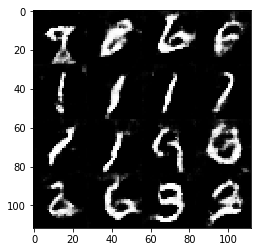

Epoch 0/2... Discriminator Loss: 0.4431... Generator Loss: 3.0711
Epoch 0/2... Discriminator Loss: 0.4192... Generator Loss: 3.9364
Epoch 0/2... Discriminator Loss: 0.4921... Generator Loss: 3.2240
Epoch 0/2... Discriminator Loss: 0.4283... Generator Loss: 2.3538
Epoch 0/2... Discriminator Loss: 0.5191... Generator Loss: 2.4142


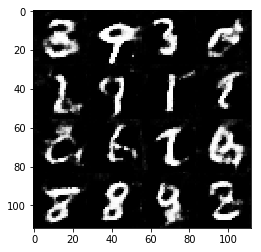

Epoch 0/2... Discriminator Loss: 0.7719... Generator Loss: 1.6290
Epoch 0/2... Discriminator Loss: 0.4167... Generator Loss: 3.4036
Epoch 0/2... Discriminator Loss: 0.4325... Generator Loss: 3.3586
Epoch 0/2... Discriminator Loss: 0.5931... Generator Loss: 2.1666
Epoch 1/2... Discriminator Loss: 0.5038... Generator Loss: 2.4359


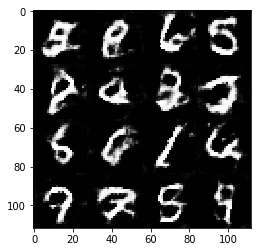

Epoch 1/2... Discriminator Loss: 1.5093... Generator Loss: 0.9633
Epoch 1/2... Discriminator Loss: 0.4760... Generator Loss: 3.4292
Epoch 1/2... Discriminator Loss: 0.4858... Generator Loss: 2.5512
Epoch 1/2... Discriminator Loss: 0.4502... Generator Loss: 2.9927
Epoch 1/2... Discriminator Loss: 0.4027... Generator Loss: 3.7303


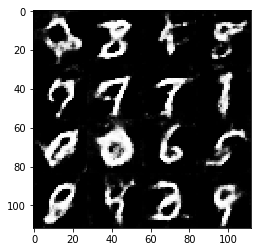

Epoch 1/2... Discriminator Loss: 0.4345... Generator Loss: 4.1974
Epoch 1/2... Discriminator Loss: 0.4513... Generator Loss: 3.1764
Epoch 1/2... Discriminator Loss: 0.6091... Generator Loss: 1.8816
Epoch 1/2... Discriminator Loss: 0.3821... Generator Loss: 3.8698
Epoch 1/2... Discriminator Loss: 0.4607... Generator Loss: 2.9298


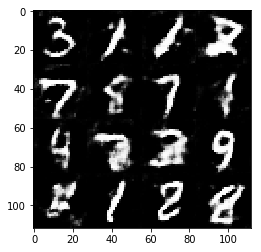

Epoch 1/2... Discriminator Loss: 0.5521... Generator Loss: 2.2855
Epoch 1/2... Discriminator Loss: 0.7386... Generator Loss: 1.6967
Epoch 1/2... Discriminator Loss: 0.4057... Generator Loss: 3.6684
Epoch 1/2... Discriminator Loss: 0.3967... Generator Loss: 3.0098
Epoch 1/2... Discriminator Loss: 1.0360... Generator Loss: 1.5232


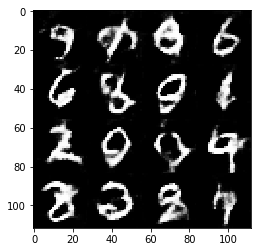

Epoch 1/2... Discriminator Loss: 0.4210... Generator Loss: 3.0570
Epoch 1/2... Discriminator Loss: 0.4519... Generator Loss: 2.7977
Epoch 1/2... Discriminator Loss: 0.4272... Generator Loss: 2.9592
Epoch 1/2... Discriminator Loss: 0.3967... Generator Loss: 3.5374
Epoch 1/2... Discriminator Loss: 0.4354... Generator Loss: 3.2814


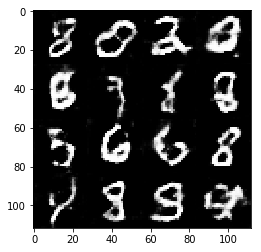

Epoch 1/2... Discriminator Loss: 0.4047... Generator Loss: 3.1034
Epoch 1/2... Discriminator Loss: 0.4125... Generator Loss: 3.1918
Epoch 1/2... Discriminator Loss: 0.4582... Generator Loss: 2.9907
Epoch 1/2... Discriminator Loss: 0.7279... Generator Loss: 1.6705
Epoch 1/2... Discriminator Loss: 0.5287... Generator Loss: 2.5203


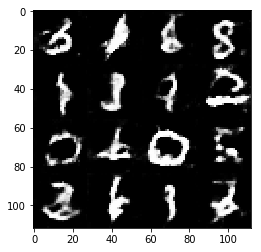

Epoch 1/2... Discriminator Loss: 0.3948... Generator Loss: 4.1569
Epoch 1/2... Discriminator Loss: 0.5068... Generator Loss: 3.8478
Epoch 1/2... Discriminator Loss: 0.4935... Generator Loss: 2.4469
Epoch 1/2... Discriminator Loss: 0.8304... Generator Loss: 1.7782
Epoch 1/2... Discriminator Loss: 0.5064... Generator Loss: 2.7977


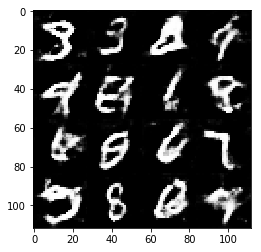

Epoch 1/2... Discriminator Loss: 0.4292... Generator Loss: 3.7852
Epoch 1/2... Discriminator Loss: 0.3943... Generator Loss: 3.8822
Epoch 1/2... Discriminator Loss: 0.4441... Generator Loss: 4.1289
Epoch 1/2... Discriminator Loss: 0.3786... Generator Loss: 4.1952
Epoch 1/2... Discriminator Loss: 0.6996... Generator Loss: 1.5786


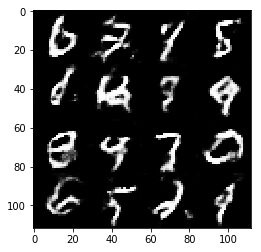

Epoch 1/2... Discriminator Loss: 0.4082... Generator Loss: 3.6123
Epoch 1/2... Discriminator Loss: 0.4396... Generator Loss: 2.6549
Epoch 1/2... Discriminator Loss: 0.4214... Generator Loss: 3.0052
Epoch 1/2... Discriminator Loss: 0.4723... Generator Loss: 3.1380
Epoch 1/2... Discriminator Loss: 0.3977... Generator Loss: 4.3505


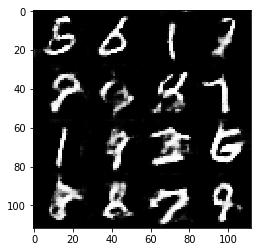

Epoch 1/2... Discriminator Loss: 0.4110... Generator Loss: 3.1164
Epoch 1/2... Discriminator Loss: 0.3712... Generator Loss: 4.3179
Epoch 1/2... Discriminator Loss: 0.5046... Generator Loss: 3.0115
Epoch 1/2... Discriminator Loss: 0.7038... Generator Loss: 4.6610
Epoch 1/2... Discriminator Loss: 0.4555... Generator Loss: 2.8974


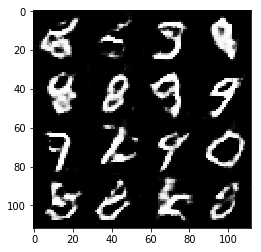

Epoch 1/2... Discriminator Loss: 0.5202... Generator Loss: 2.2608
Epoch 1/2... Discriminator Loss: 0.4949... Generator Loss: 3.1968
Epoch 1/2... Discriminator Loss: 0.5984... Generator Loss: 2.0433
Epoch 1/2... Discriminator Loss: 0.3822... Generator Loss: 3.9258
Epoch 1/2... Discriminator Loss: 0.3566... Generator Loss: 3.9837


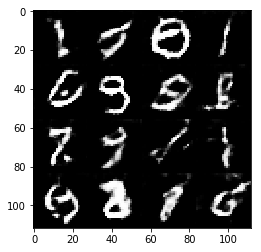

Epoch 1/2... Discriminator Loss: 0.3853... Generator Loss: 3.8275
Epoch 1/2... Discriminator Loss: 0.4524... Generator Loss: 2.9879
Epoch 1/2... Discriminator Loss: 0.6490... Generator Loss: 1.9142
Epoch 1/2... Discriminator Loss: 0.7103... Generator Loss: 2.1835
Epoch 1/2... Discriminator Loss: 0.4166... Generator Loss: 3.4657


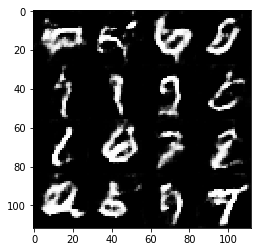

Epoch 1/2... Discriminator Loss: 0.3796... Generator Loss: 3.9832
Epoch 1/2... Discriminator Loss: 0.4260... Generator Loss: 2.5915
Epoch 1/2... Discriminator Loss: 0.4055... Generator Loss: 3.4443
Epoch 1/2... Discriminator Loss: 0.4038... Generator Loss: 3.0835
Epoch 1/2... Discriminator Loss: 0.4500... Generator Loss: 4.7739


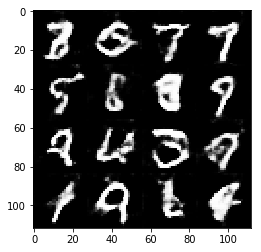

Epoch 1/2... Discriminator Loss: 0.4769... Generator Loss: 3.1938
Epoch 1/2... Discriminator Loss: 0.3848... Generator Loss: 3.5452
Epoch 1/2... Discriminator Loss: 0.3816... Generator Loss: 3.2332
Epoch 1/2... Discriminator Loss: 0.3756... Generator Loss: 4.5226
Epoch 1/2... Discriminator Loss: 0.3930... Generator Loss: 3.2902


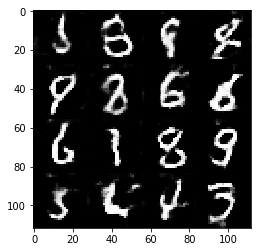

Epoch 1/2... Discriminator Loss: 0.4126... Generator Loss: 2.9351
Epoch 1/2... Discriminator Loss: 0.3421... Generator Loss: 4.6743
Epoch 1/2... Discriminator Loss: 0.4177... Generator Loss: 3.4523
Epoch 1/2... Discriminator Loss: 0.6108... Generator Loss: 2.1107
Epoch 1/2... Discriminator Loss: 0.3959... Generator Loss: 3.6500


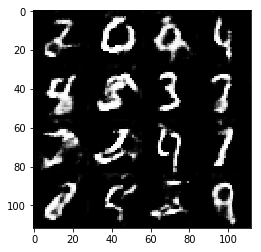

Epoch 1/2... Discriminator Loss: 0.4891... Generator Loss: 3.1014
Epoch 1/2... Discriminator Loss: 0.4129... Generator Loss: 2.7050
Epoch 1/2... Discriminator Loss: 0.6378... Generator Loss: 1.7511
Epoch 1/2... Discriminator Loss: 0.5894... Generator Loss: 2.0325
Epoch 1/2... Discriminator Loss: 0.3646... Generator Loss: 4.7771


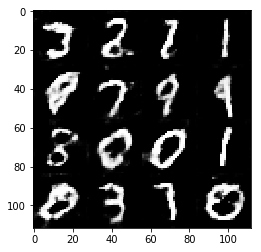

Epoch 1/2... Discriminator Loss: 0.3803... Generator Loss: 4.0098
Epoch 1/2... Discriminator Loss: 0.4691... Generator Loss: 2.8329
Epoch 1/2... Discriminator Loss: 0.4094... Generator Loss: 3.9860
Epoch 1/2... Discriminator Loss: 0.4258... Generator Loss: 4.0198
Epoch 1/2... Discriminator Loss: 0.3588... Generator Loss: 4.5893


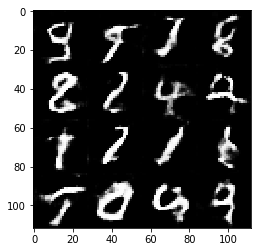

Epoch 1/2... Discriminator Loss: 0.6504... Generator Loss: 2.1599
Epoch 1/2... Discriminator Loss: 0.3598... Generator Loss: 4.2986
Epoch 1/2... Discriminator Loss: 0.5004... Generator Loss: 2.1521
Epoch 1/2... Discriminator Loss: 0.4437... Generator Loss: 3.3533
Epoch 1/2... Discriminator Loss: 0.4507... Generator Loss: 2.5912


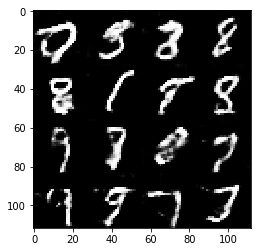

Epoch 1/2... Discriminator Loss: 0.4192... Generator Loss: 2.9962
Epoch 1/2... Discriminator Loss: 0.3631... Generator Loss: 4.1653
Epoch 1/2... Discriminator Loss: 0.3958... Generator Loss: 3.3100
Epoch 1/2... Discriminator Loss: 0.4522... Generator Loss: 3.4354
Epoch 1/2... Discriminator Loss: 0.3747... Generator Loss: 3.8021


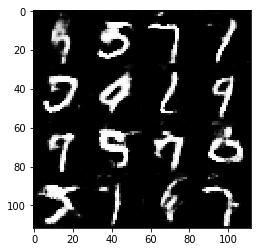

Epoch 1/2... Discriminator Loss: 0.4043... Generator Loss: 3.9070
Epoch 1/2... Discriminator Loss: 0.4096... Generator Loss: 3.5558
Epoch 1/2... Discriminator Loss: 0.3451... Generator Loss: 4.9723


In [13]:
batch_size = 64
z_dim = 128
learning_rate = 0.0002     #Tried 0.001 previously, quality was not great.
beta1 = 0.5


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
epochs = 2

mnist_dataset = helper.Dataset('mnist', glob(os.path.join(data_dir, 'mnist/*.jpg')))
with tf.Graph().as_default():
    train(epochs, batch_size, z_dim, learning_rate, beta1, mnist_dataset.get_batches,
          mnist_dataset.shape, mnist_dataset.image_mode)

### CelebA
Run your GANs on CelebA.  It will take around 20 minutes on the average GPU to run one epoch.  You can run the whole epoch or stop when it starts to generate realistic faces.

Epoch 0/1... Discriminator Loss: 0.4608... Generator Loss: 2.8103
Epoch 0/1... Discriminator Loss: 0.4024... Generator Loss: 4.6698
Epoch 0/1... Discriminator Loss: 0.4305... Generator Loss: 3.3772
Epoch 0/1... Discriminator Loss: 0.7148... Generator Loss: 2.3158


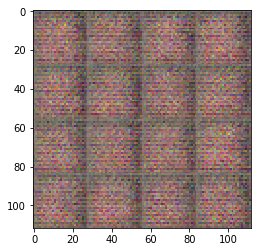

Epoch 0/1... Discriminator Loss: 0.7175... Generator Loss: 2.1176
Epoch 0/1... Discriminator Loss: 0.3501... Generator Loss: 6.4006
Epoch 0/1... Discriminator Loss: 0.5611... Generator Loss: 4.1310
Epoch 0/1... Discriminator Loss: 0.3727... Generator Loss: 4.4544
Epoch 0/1... Discriminator Loss: 0.3695... Generator Loss: 3.9098


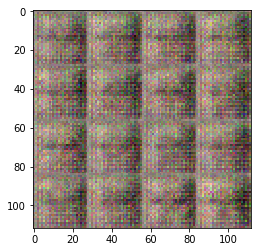

Epoch 0/1... Discriminator Loss: 0.4596... Generator Loss: 2.8128
Epoch 0/1... Discriminator Loss: 0.3593... Generator Loss: 4.6760
Epoch 0/1... Discriminator Loss: 0.3569... Generator Loss: 5.4397
Epoch 0/1... Discriminator Loss: 0.3566... Generator Loss: 6.0103
Epoch 0/1... Discriminator Loss: 0.3472... Generator Loss: 5.3360


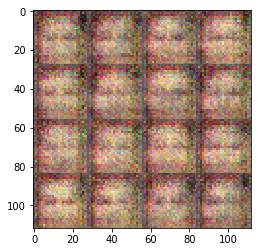

Epoch 0/1... Discriminator Loss: 0.3591... Generator Loss: 3.8050
Epoch 0/1... Discriminator Loss: 0.3659... Generator Loss: 4.3321
Epoch 0/1... Discriminator Loss: 0.7151... Generator Loss: 5.6848
Epoch 0/1... Discriminator Loss: 0.4611... Generator Loss: 3.2139
Epoch 0/1... Discriminator Loss: 0.3792... Generator Loss: 3.9885


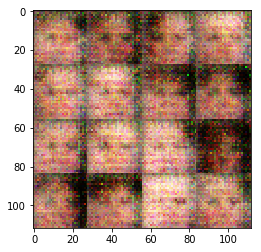

Epoch 0/1... Discriminator Loss: 0.4142... Generator Loss: 3.4546
Epoch 0/1... Discriminator Loss: 0.3804... Generator Loss: 3.5507
Epoch 0/1... Discriminator Loss: 0.3575... Generator Loss: 4.7140
Epoch 0/1... Discriminator Loss: 0.4346... Generator Loss: 3.2046
Epoch 0/1... Discriminator Loss: 0.4221... Generator Loss: 3.2310


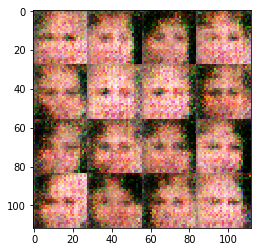

Epoch 0/1... Discriminator Loss: 0.3831... Generator Loss: 4.1160
Epoch 0/1... Discriminator Loss: 0.3608... Generator Loss: 4.6857
Epoch 0/1... Discriminator Loss: 0.4386... Generator Loss: 2.9323
Epoch 0/1... Discriminator Loss: 0.3852... Generator Loss: 5.1707
Epoch 0/1... Discriminator Loss: 0.3795... Generator Loss: 4.2895


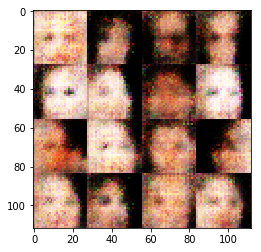

Epoch 0/1... Discriminator Loss: 0.3778... Generator Loss: 3.8766
Epoch 0/1... Discriminator Loss: 0.3908... Generator Loss: 4.0106
Epoch 0/1... Discriminator Loss: 0.4062... Generator Loss: 3.6207
Epoch 0/1... Discriminator Loss: 0.3871... Generator Loss: 3.7842
Epoch 0/1... Discriminator Loss: 0.4835... Generator Loss: 2.4820


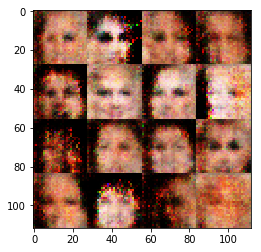

Epoch 0/1... Discriminator Loss: 0.3899... Generator Loss: 4.2938
Epoch 0/1... Discriminator Loss: 0.3786... Generator Loss: 4.8956
Epoch 0/1... Discriminator Loss: 0.3782... Generator Loss: 4.1295
Epoch 0/1... Discriminator Loss: 0.3719... Generator Loss: 4.5312
Epoch 0/1... Discriminator Loss: 0.3944... Generator Loss: 4.1126


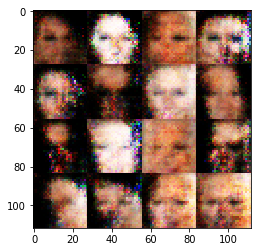

Epoch 0/1... Discriminator Loss: 0.3717... Generator Loss: 4.2206
Epoch 0/1... Discriminator Loss: 0.3533... Generator Loss: 4.3131
Epoch 0/1... Discriminator Loss: 0.4749... Generator Loss: 2.9358
Epoch 0/1... Discriminator Loss: 0.4734... Generator Loss: 2.5104
Epoch 0/1... Discriminator Loss: 0.4597... Generator Loss: 4.2470


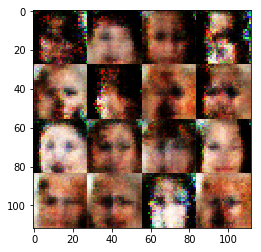

Epoch 0/1... Discriminator Loss: 0.4386... Generator Loss: 3.0514
Epoch 0/1... Discriminator Loss: 1.0571... Generator Loss: 7.4697
Epoch 0/1... Discriminator Loss: 0.5345... Generator Loss: 2.3795
Epoch 0/1... Discriminator Loss: 0.3790... Generator Loss: 4.6130
Epoch 0/1... Discriminator Loss: 0.4997... Generator Loss: 2.5673


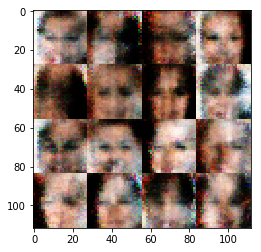

Epoch 0/1... Discriminator Loss: 0.5538... Generator Loss: 2.3218
Epoch 0/1... Discriminator Loss: 0.4218... Generator Loss: 3.5768
Epoch 0/1... Discriminator Loss: 1.1554... Generator Loss: 0.8728
Epoch 0/1... Discriminator Loss: 0.5640... Generator Loss: 2.1862
Epoch 0/1... Discriminator Loss: 0.4966... Generator Loss: 3.2029


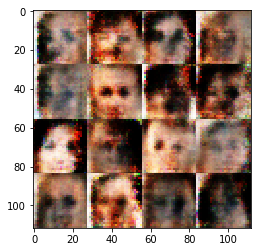

Epoch 0/1... Discriminator Loss: 0.4949... Generator Loss: 2.6207
Epoch 0/1... Discriminator Loss: 0.4561... Generator Loss: 3.8383
Epoch 0/1... Discriminator Loss: 0.4856... Generator Loss: 4.2347
Epoch 0/1... Discriminator Loss: 0.4017... Generator Loss: 3.6498
Epoch 0/1... Discriminator Loss: 0.4266... Generator Loss: 3.1928


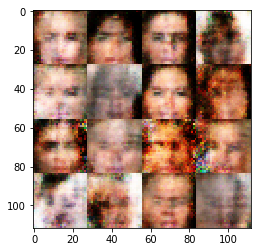

Epoch 0/1... Discriminator Loss: 0.6407... Generator Loss: 2.5942
Epoch 0/1... Discriminator Loss: 0.6230... Generator Loss: 3.6683
Epoch 0/1... Discriminator Loss: 0.5475... Generator Loss: 2.4038
Epoch 0/1... Discriminator Loss: 0.8260... Generator Loss: 4.5494
Epoch 0/1... Discriminator Loss: 0.6309... Generator Loss: 1.8137


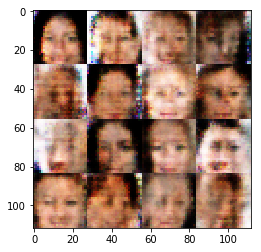

Epoch 0/1... Discriminator Loss: 0.9981... Generator Loss: 1.1620
Epoch 0/1... Discriminator Loss: 0.4612... Generator Loss: 2.4713
Epoch 0/1... Discriminator Loss: 0.5388... Generator Loss: 2.1934
Epoch 0/1... Discriminator Loss: 0.4870... Generator Loss: 3.3206
Epoch 0/1... Discriminator Loss: 0.4760... Generator Loss: 3.0431


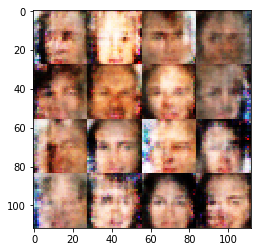

Epoch 0/1... Discriminator Loss: 0.4971... Generator Loss: 2.7307
Epoch 0/1... Discriminator Loss: 0.5286... Generator Loss: 2.6322
Epoch 0/1... Discriminator Loss: 0.6333... Generator Loss: 1.9155
Epoch 0/1... Discriminator Loss: 0.5193... Generator Loss: 3.2511
Epoch 0/1... Discriminator Loss: 0.5324... Generator Loss: 2.7102


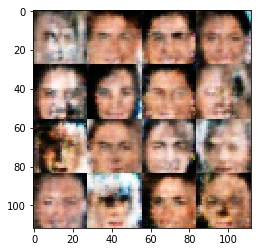

Epoch 0/1... Discriminator Loss: 0.5817... Generator Loss: 3.1077
Epoch 0/1... Discriminator Loss: 0.5381... Generator Loss: 2.5166
Epoch 0/1... Discriminator Loss: 0.7243... Generator Loss: 1.5934
Epoch 0/1... Discriminator Loss: 0.5996... Generator Loss: 1.5945
Epoch 0/1... Discriminator Loss: 1.0642... Generator Loss: 4.3365


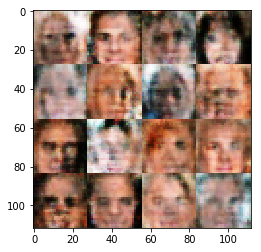

Epoch 0/1... Discriminator Loss: 0.5016... Generator Loss: 2.3969
Epoch 0/1... Discriminator Loss: 0.6607... Generator Loss: 1.7690
Epoch 0/1... Discriminator Loss: 0.4475... Generator Loss: 3.3780
Epoch 0/1... Discriminator Loss: 0.5092... Generator Loss: 2.7838
Epoch 0/1... Discriminator Loss: 0.5795... Generator Loss: 2.3771


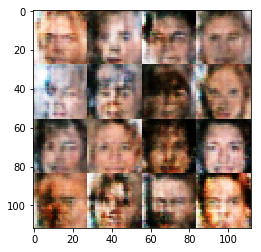

Epoch 0/1... Discriminator Loss: 0.5930... Generator Loss: 1.9492
Epoch 0/1... Discriminator Loss: 1.2008... Generator Loss: 1.0131
Epoch 0/1... Discriminator Loss: 0.5817... Generator Loss: 3.2024
Epoch 0/1... Discriminator Loss: 0.9094... Generator Loss: 1.3430
Epoch 0/1... Discriminator Loss: 0.5209... Generator Loss: 2.5528


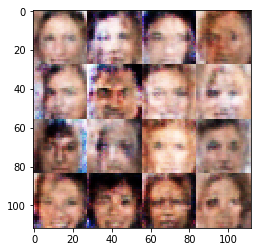

Epoch 0/1... Discriminator Loss: 0.5241... Generator Loss: 3.5721
Epoch 0/1... Discriminator Loss: 0.5531... Generator Loss: 1.8736
Epoch 0/1... Discriminator Loss: 0.6817... Generator Loss: 1.9203
Epoch 0/1... Discriminator Loss: 1.2086... Generator Loss: 1.0722
Epoch 0/1... Discriminator Loss: 0.6759... Generator Loss: 2.0522


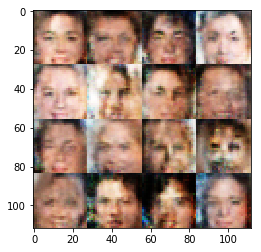

Epoch 0/1... Discriminator Loss: 0.5547... Generator Loss: 3.2706
Epoch 0/1... Discriminator Loss: 0.8865... Generator Loss: 1.3728
Epoch 0/1... Discriminator Loss: 0.5399... Generator Loss: 2.7336
Epoch 0/1... Discriminator Loss: 0.6200... Generator Loss: 4.2672
Epoch 0/1... Discriminator Loss: 0.5638... Generator Loss: 2.4021


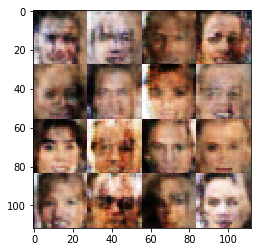

Epoch 0/1... Discriminator Loss: 0.5483... Generator Loss: 2.4913
Epoch 0/1... Discriminator Loss: 0.7125... Generator Loss: 1.9251
Epoch 0/1... Discriminator Loss: 0.4883... Generator Loss: 2.6576
Epoch 0/1... Discriminator Loss: 0.9996... Generator Loss: 1.2065
Epoch 0/1... Discriminator Loss: 0.5008... Generator Loss: 3.2374


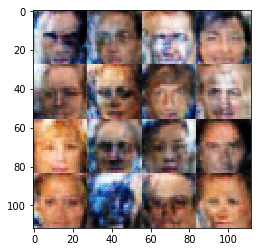

Epoch 0/1... Discriminator Loss: 0.5888... Generator Loss: 1.8280
Epoch 0/1... Discriminator Loss: 0.7725... Generator Loss: 1.5425
Epoch 0/1... Discriminator Loss: 0.4969... Generator Loss: 1.8460
Epoch 0/1... Discriminator Loss: 0.6287... Generator Loss: 1.9762
Epoch 0/1... Discriminator Loss: 0.5211... Generator Loss: 2.2664


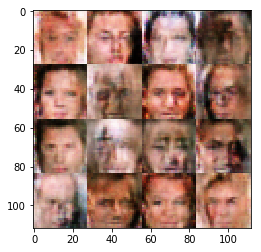

Epoch 0/1... Discriminator Loss: 0.4758... Generator Loss: 3.5068
Epoch 0/1... Discriminator Loss: 0.4316... Generator Loss: 3.0402
Epoch 0/1... Discriminator Loss: 0.5297... Generator Loss: 3.0001
Epoch 0/1... Discriminator Loss: 0.4856... Generator Loss: 2.5853
Epoch 0/1... Discriminator Loss: 0.5261... Generator Loss: 2.6633


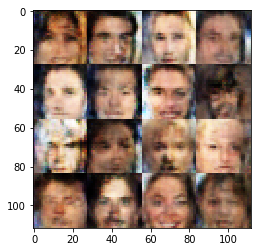

Epoch 0/1... Discriminator Loss: 0.4874... Generator Loss: 2.9528
Epoch 0/1... Discriminator Loss: 0.4584... Generator Loss: 3.2834
Epoch 0/1... Discriminator Loss: 0.5780... Generator Loss: 2.0923
Epoch 0/1... Discriminator Loss: 0.5339... Generator Loss: 2.2746
Epoch 0/1... Discriminator Loss: 0.4607... Generator Loss: 3.3209


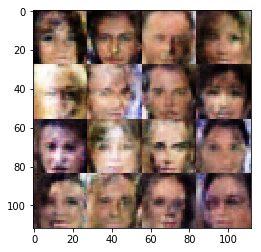

Epoch 0/1... Discriminator Loss: 0.5036... Generator Loss: 2.3408
Epoch 0/1... Discriminator Loss: 0.6317... Generator Loss: 2.0478
Epoch 0/1... Discriminator Loss: 0.5460... Generator Loss: 2.3002
Epoch 0/1... Discriminator Loss: 0.5122... Generator Loss: 3.2188
Epoch 0/1... Discriminator Loss: 0.5126... Generator Loss: 2.5739


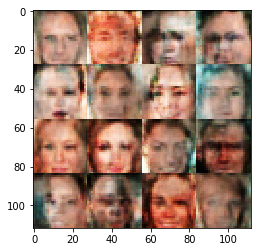

Epoch 0/1... Discriminator Loss: 0.4853... Generator Loss: 2.2286
Epoch 0/1... Discriminator Loss: 0.6210... Generator Loss: 2.1684
Epoch 0/1... Discriminator Loss: 0.5396... Generator Loss: 2.3179
Epoch 0/1... Discriminator Loss: 0.7900... Generator Loss: 1.5621
Epoch 0/1... Discriminator Loss: 0.4424... Generator Loss: 3.0849


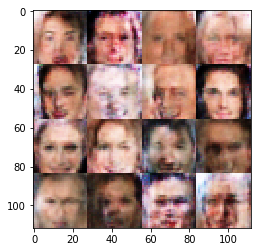

Epoch 0/1... Discriminator Loss: 0.5000... Generator Loss: 2.6303
Epoch 0/1... Discriminator Loss: 0.4463... Generator Loss: 3.0931
Epoch 0/1... Discriminator Loss: 0.4759... Generator Loss: 3.1958
Epoch 0/1... Discriminator Loss: 0.6382... Generator Loss: 2.4389
Epoch 0/1... Discriminator Loss: 0.4676... Generator Loss: 3.2093


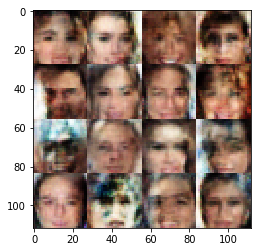

Epoch 0/1... Discriminator Loss: 0.6160... Generator Loss: 2.5505
Epoch 0/1... Discriminator Loss: 0.5186... Generator Loss: 2.4850
Epoch 0/1... Discriminator Loss: 0.4816... Generator Loss: 2.9210
Epoch 0/1... Discriminator Loss: 0.5420... Generator Loss: 3.2085
Epoch 0/1... Discriminator Loss: 0.5322... Generator Loss: 3.7215


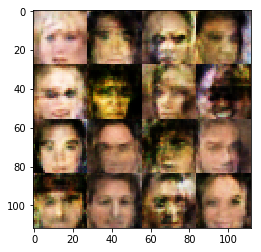

Epoch 0/1... Discriminator Loss: 0.7926... Generator Loss: 2.0337
Epoch 0/1... Discriminator Loss: 0.5963... Generator Loss: 1.8388
Epoch 0/1... Discriminator Loss: 0.5785... Generator Loss: 2.4797
Epoch 0/1... Discriminator Loss: 0.9593... Generator Loss: 1.3396
Epoch 0/1... Discriminator Loss: 0.5143... Generator Loss: 2.7953


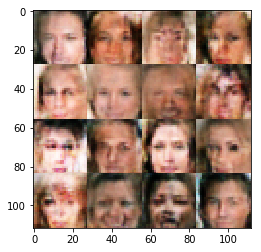

Epoch 0/1... Discriminator Loss: 0.5060... Generator Loss: 2.5937
Epoch 0/1... Discriminator Loss: 0.4681... Generator Loss: 3.3159
Epoch 0/1... Discriminator Loss: 0.4822... Generator Loss: 3.8206
Epoch 0/1... Discriminator Loss: 0.6469... Generator Loss: 2.9086
Epoch 0/1... Discriminator Loss: 0.5539... Generator Loss: 2.4372


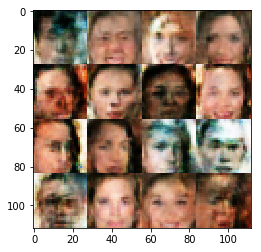

Epoch 0/1... Discriminator Loss: 0.4514... Generator Loss: 3.0479
Epoch 0/1... Discriminator Loss: 0.5725... Generator Loss: 2.0980
Epoch 0/1... Discriminator Loss: 0.5115... Generator Loss: 3.4454
Epoch 0/1... Discriminator Loss: 0.5157... Generator Loss: 2.4421
Epoch 0/1... Discriminator Loss: 0.5384... Generator Loss: 2.2558


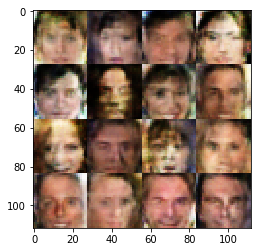

Epoch 0/1... Discriminator Loss: 0.4630... Generator Loss: 2.9687
Epoch 0/1... Discriminator Loss: 0.4275... Generator Loss: 3.0160
Epoch 0/1... Discriminator Loss: 0.4457... Generator Loss: 2.4886
Epoch 0/1... Discriminator Loss: 0.7925... Generator Loss: 1.7937
Epoch 0/1... Discriminator Loss: 1.1805... Generator Loss: 1.3243


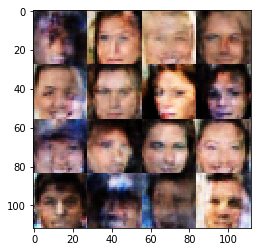

Epoch 0/1... Discriminator Loss: 0.4614... Generator Loss: 3.0925
Epoch 0/1... Discriminator Loss: 0.4807... Generator Loss: 2.5797
Epoch 0/1... Discriminator Loss: 0.8775... Generator Loss: 1.8237
Epoch 0/1... Discriminator Loss: 0.5663... Generator Loss: 2.1996
Epoch 0/1... Discriminator Loss: 0.6088... Generator Loss: 3.5834


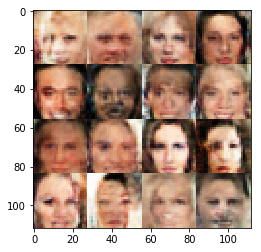

Epoch 0/1... Discriminator Loss: 0.4532... Generator Loss: 3.5504
Epoch 0/1... Discriminator Loss: 0.4675... Generator Loss: 3.4293
Epoch 0/1... Discriminator Loss: 0.5825... Generator Loss: 2.1053
Epoch 0/1... Discriminator Loss: 1.0031... Generator Loss: 1.1050
Epoch 0/1... Discriminator Loss: 0.6190... Generator Loss: 2.2968


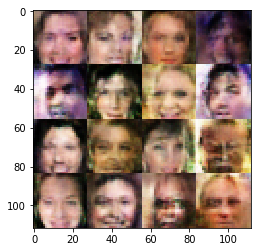

Epoch 0/1... Discriminator Loss: 1.2622... Generator Loss: 1.0307
Epoch 0/1... Discriminator Loss: 0.4982... Generator Loss: 2.7051
Epoch 0/1... Discriminator Loss: 0.4614... Generator Loss: 4.3817
Epoch 0/1... Discriminator Loss: 0.4595... Generator Loss: 4.0701
Epoch 0/1... Discriminator Loss: 0.5581... Generator Loss: 3.5854


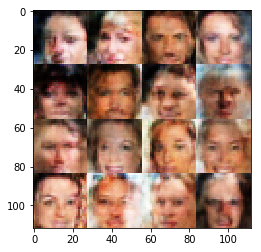

Epoch 0/1... Discriminator Loss: 0.4219... Generator Loss: 3.0865
Epoch 0/1... Discriminator Loss: 0.6975... Generator Loss: 1.8702
Epoch 0/1... Discriminator Loss: 0.6242... Generator Loss: 2.0321
Epoch 0/1... Discriminator Loss: 0.7449... Generator Loss: 1.8310
Epoch 0/1... Discriminator Loss: 0.5280... Generator Loss: 2.5715


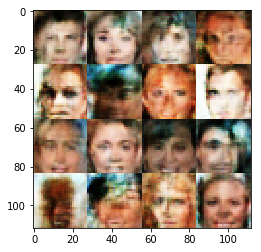

Epoch 0/1... Discriminator Loss: 0.4339... Generator Loss: 3.3332
Epoch 0/1... Discriminator Loss: 0.6068... Generator Loss: 2.0306
Epoch 0/1... Discriminator Loss: 1.0553... Generator Loss: 1.1582
Epoch 0/1... Discriminator Loss: 0.6008... Generator Loss: 2.3292
Epoch 0/1... Discriminator Loss: 0.5535... Generator Loss: 2.0312


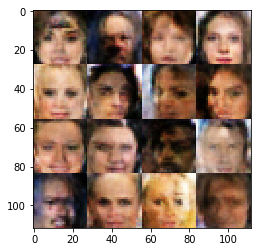

Epoch 0/1... Discriminator Loss: 0.5112... Generator Loss: 3.2249
Epoch 0/1... Discriminator Loss: 0.4264... Generator Loss: 3.3232
Epoch 0/1... Discriminator Loss: 0.4580... Generator Loss: 2.4017
Epoch 0/1... Discriminator Loss: 0.4457... Generator Loss: 3.1830
Epoch 0/1... Discriminator Loss: 0.5039... Generator Loss: 2.8841


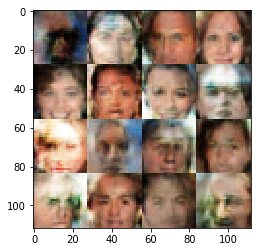

Epoch 0/1... Discriminator Loss: 0.4610... Generator Loss: 2.7077
Epoch 0/1... Discriminator Loss: 0.4730... Generator Loss: 2.7684
Epoch 0/1... Discriminator Loss: 0.5722... Generator Loss: 1.8794
Epoch 0/1... Discriminator Loss: 0.4087... Generator Loss: 3.1128
Epoch 0/1... Discriminator Loss: 0.4478... Generator Loss: 3.2120


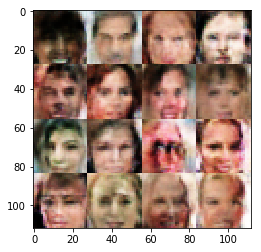

Epoch 0/1... Discriminator Loss: 0.4047... Generator Loss: 3.4860
Epoch 0/1... Discriminator Loss: 0.4066... Generator Loss: 3.3393
Epoch 0/1... Discriminator Loss: 0.3842... Generator Loss: 4.0003
Epoch 0/1... Discriminator Loss: 0.7911... Generator Loss: 1.8594
Epoch 0/1... Discriminator Loss: 0.4046... Generator Loss: 2.9882


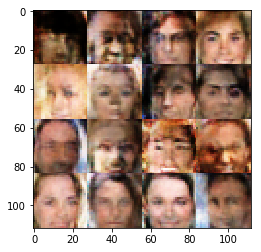

Epoch 0/1... Discriminator Loss: 0.5515... Generator Loss: 1.4919
Epoch 0/1... Discriminator Loss: 0.4644... Generator Loss: 3.1528
Epoch 0/1... Discriminator Loss: 0.5613... Generator Loss: 1.9544
Epoch 0/1... Discriminator Loss: 0.5359... Generator Loss: 2.9824
Epoch 0/1... Discriminator Loss: 0.5365... Generator Loss: 1.8388


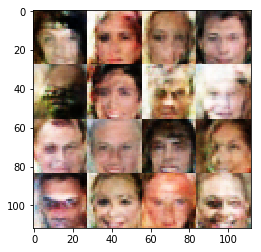

Epoch 0/1... Discriminator Loss: 0.5057... Generator Loss: 2.8125
Epoch 0/1... Discriminator Loss: 0.5616... Generator Loss: 2.5290
Epoch 0/1... Discriminator Loss: 0.4848... Generator Loss: 3.4058
Epoch 0/1... Discriminator Loss: 0.4377... Generator Loss: 3.2879
Epoch 0/1... Discriminator Loss: 0.6377... Generator Loss: 2.2952


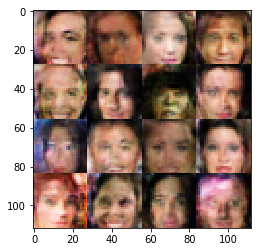

Epoch 0/1... Discriminator Loss: 0.5213... Generator Loss: 3.0536
Epoch 0/1... Discriminator Loss: 0.4873... Generator Loss: 3.0281
Epoch 0/1... Discriminator Loss: 0.4424... Generator Loss: 3.1654
Epoch 0/1... Discriminator Loss: 0.6533... Generator Loss: 2.1095
Epoch 0/1... Discriminator Loss: 0.8293... Generator Loss: 1.5849


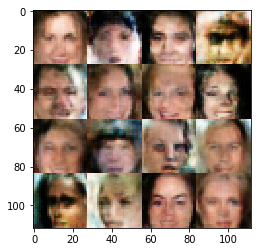

Epoch 0/1... Discriminator Loss: 0.3997... Generator Loss: 3.5140
Epoch 0/1... Discriminator Loss: 0.4872... Generator Loss: 2.6741
Epoch 0/1... Discriminator Loss: 0.5164... Generator Loss: 2.8235
Epoch 0/1... Discriminator Loss: 0.4626... Generator Loss: 2.7358
Epoch 0/1... Discriminator Loss: 0.4852... Generator Loss: 2.6758


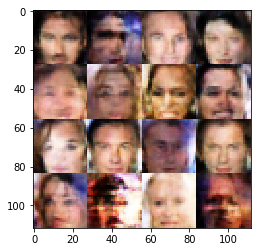

Epoch 0/1... Discriminator Loss: 0.4640... Generator Loss: 3.3022
Epoch 0/1... Discriminator Loss: 0.5797... Generator Loss: 2.3649
Epoch 0/1... Discriminator Loss: 0.5470... Generator Loss: 4.9751
Epoch 0/1... Discriminator Loss: 0.5530... Generator Loss: 2.4465
Epoch 0/1... Discriminator Loss: 0.4733... Generator Loss: 3.0582


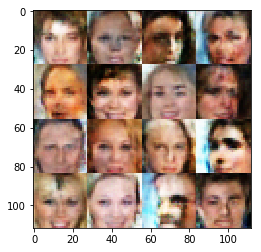

Epoch 0/1... Discriminator Loss: 0.7874... Generator Loss: 1.3067
Epoch 0/1... Discriminator Loss: 0.4596... Generator Loss: 3.2108
Epoch 0/1... Discriminator Loss: 0.6710... Generator Loss: 1.9012
Epoch 0/1... Discriminator Loss: 0.3880... Generator Loss: 4.0326
Epoch 0/1... Discriminator Loss: 0.6183... Generator Loss: 2.0387


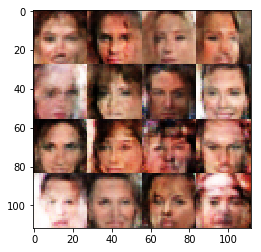

Epoch 0/1... Discriminator Loss: 0.4508... Generator Loss: 3.3820
Epoch 0/1... Discriminator Loss: 0.4885... Generator Loss: 3.0588
Epoch 0/1... Discriminator Loss: 0.4439... Generator Loss: 3.0081
Epoch 0/1... Discriminator Loss: 0.4805... Generator Loss: 3.0727
Epoch 0/1... Discriminator Loss: 0.4407... Generator Loss: 3.1940


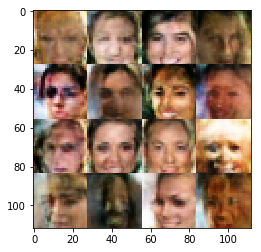

Epoch 0/1... Discriminator Loss: 0.5374... Generator Loss: 2.1805
Epoch 0/1... Discriminator Loss: 0.4314... Generator Loss: 3.5820
Epoch 0/1... Discriminator Loss: 0.4363... Generator Loss: 3.1748
Epoch 0/1... Discriminator Loss: 0.4246... Generator Loss: 4.0315
Epoch 0/1... Discriminator Loss: 0.5572... Generator Loss: 2.1640


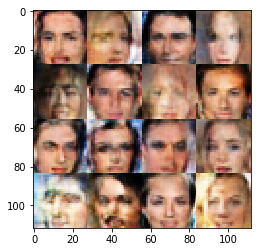

Epoch 0/1... Discriminator Loss: 0.5087... Generator Loss: 2.4890
Epoch 0/1... Discriminator Loss: 0.6099... Generator Loss: 2.3710
Epoch 0/1... Discriminator Loss: 0.5248... Generator Loss: 4.6536
Epoch 0/1... Discriminator Loss: 0.6072... Generator Loss: 1.8920
Epoch 0/1... Discriminator Loss: 0.4705... Generator Loss: 2.8844


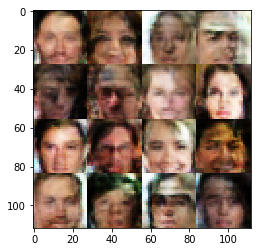

Epoch 0/1... Discriminator Loss: 0.5362... Generator Loss: 2.6165
Epoch 0/1... Discriminator Loss: 0.5091... Generator Loss: 2.2542
Epoch 0/1... Discriminator Loss: 0.4776... Generator Loss: 2.8510
Epoch 0/1... Discriminator Loss: 0.6200... Generator Loss: 2.2153
Epoch 0/1... Discriminator Loss: 0.6910... Generator Loss: 1.8526


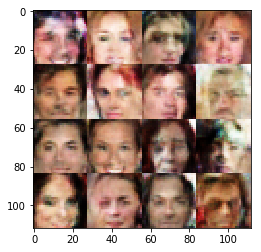

Epoch 0/1... Discriminator Loss: 0.8074... Generator Loss: 1.7307
Epoch 0/1... Discriminator Loss: 0.5358... Generator Loss: 3.7223
Epoch 0/1... Discriminator Loss: 0.3991... Generator Loss: 3.5030
Epoch 0/1... Discriminator Loss: 0.4904... Generator Loss: 2.6519
Epoch 0/1... Discriminator Loss: 0.6945... Generator Loss: 1.7013


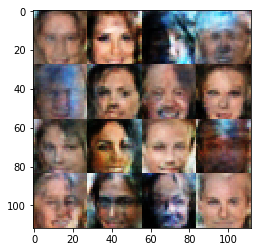

Epoch 0/1... Discriminator Loss: 0.4436... Generator Loss: 3.5434
Epoch 0/1... Discriminator Loss: 0.5493... Generator Loss: 2.6036
Epoch 0/1... Discriminator Loss: 0.4759... Generator Loss: 2.3958
Epoch 0/1... Discriminator Loss: 0.4229... Generator Loss: 3.1649
Epoch 0/1... Discriminator Loss: 0.4400... Generator Loss: 3.7749


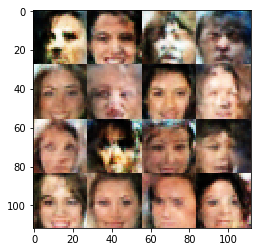

Epoch 0/1... Discriminator Loss: 0.6239... Generator Loss: 1.9504
Epoch 0/1... Discriminator Loss: 0.6548... Generator Loss: 1.7370
Epoch 0/1... Discriminator Loss: 0.4780... Generator Loss: 3.1329
Epoch 0/1... Discriminator Loss: 0.4764... Generator Loss: 3.0150
Epoch 0/1... Discriminator Loss: 0.6533... Generator Loss: 1.5063


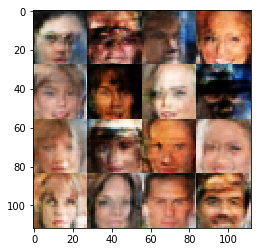

Epoch 0/1... Discriminator Loss: 0.5029... Generator Loss: 2.7680
Epoch 0/1... Discriminator Loss: 0.4552... Generator Loss: 2.9091
Epoch 0/1... Discriminator Loss: 0.3782... Generator Loss: 4.9015
Epoch 0/1... Discriminator Loss: 0.6751... Generator Loss: 1.8968
Epoch 0/1... Discriminator Loss: 0.4825... Generator Loss: 2.7900


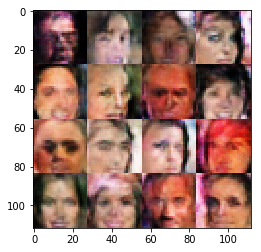

Epoch 0/1... Discriminator Loss: 0.4479... Generator Loss: 2.8661
Epoch 0/1... Discriminator Loss: 0.5611... Generator Loss: 2.3448
Epoch 0/1... Discriminator Loss: 0.4802... Generator Loss: 2.2142
Epoch 0/1... Discriminator Loss: 0.5732... Generator Loss: 3.7112
Epoch 0/1... Discriminator Loss: 0.4584... Generator Loss: 2.8400


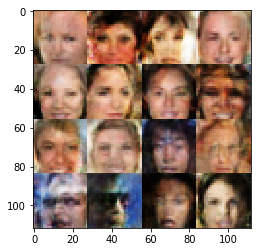

Epoch 0/1... Discriminator Loss: 0.4239... Generator Loss: 3.2836
Epoch 0/1... Discriminator Loss: 0.5231... Generator Loss: 2.3276
Epoch 0/1... Discriminator Loss: 0.5054... Generator Loss: 3.5402
Epoch 0/1... Discriminator Loss: 0.4455... Generator Loss: 4.2800
Epoch 0/1... Discriminator Loss: 0.4365... Generator Loss: 3.6472


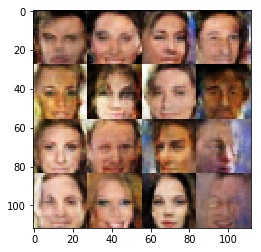

Epoch 0/1... Discriminator Loss: 0.4522... Generator Loss: 2.8036
Epoch 0/1... Discriminator Loss: 0.4928... Generator Loss: 3.0597
Epoch 0/1... Discriminator Loss: 0.5216... Generator Loss: 2.2465
Epoch 0/1... Discriminator Loss: 0.5726... Generator Loss: 4.2551
Epoch 0/1... Discriminator Loss: 0.6328... Generator Loss: 1.9644


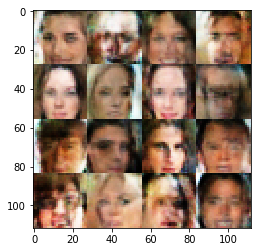

Epoch 0/1... Discriminator Loss: 0.4441... Generator Loss: 3.5504
Epoch 0/1... Discriminator Loss: 0.5785... Generator Loss: 1.9916
Epoch 0/1... Discriminator Loss: 0.6901... Generator Loss: 1.9021
Epoch 0/1... Discriminator Loss: 0.4892... Generator Loss: 2.4375
Epoch 0/1... Discriminator Loss: 0.4032... Generator Loss: 4.1074


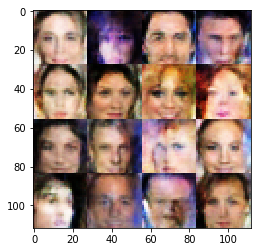

Epoch 0/1... Discriminator Loss: 0.4593... Generator Loss: 2.7111
Epoch 0/1... Discriminator Loss: 0.3871... Generator Loss: 3.6597
Epoch 0/1... Discriminator Loss: 0.4023... Generator Loss: 3.0424
Epoch 0/1... Discriminator Loss: 0.4167... Generator Loss: 3.7731
Epoch 0/1... Discriminator Loss: 0.4712... Generator Loss: 2.6735


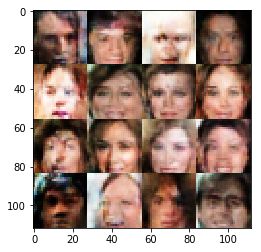

Epoch 0/1... Discriminator Loss: 0.4610... Generator Loss: 3.0674
Epoch 0/1... Discriminator Loss: 0.7811... Generator Loss: 1.9897
Epoch 0/1... Discriminator Loss: 0.4920... Generator Loss: 2.9833
Epoch 0/1... Discriminator Loss: 0.6707... Generator Loss: 1.8348
Epoch 0/1... Discriminator Loss: 0.4448... Generator Loss: 3.2440


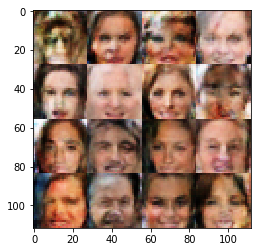

Epoch 0/1... Discriminator Loss: 0.4648... Generator Loss: 2.5590
Epoch 0/1... Discriminator Loss: 0.4440... Generator Loss: 3.1725
Epoch 0/1... Discriminator Loss: 0.6203... Generator Loss: 2.6512
Epoch 0/1... Discriminator Loss: 0.4998... Generator Loss: 2.3519
Epoch 0/1... Discriminator Loss: 0.5061... Generator Loss: 2.5033


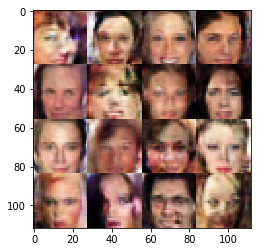

Epoch 0/1... Discriminator Loss: 0.4112... Generator Loss: 2.9830
Epoch 0/1... Discriminator Loss: 0.3906... Generator Loss: 3.4159
Epoch 0/1... Discriminator Loss: 0.4549... Generator Loss: 2.7904
Epoch 0/1... Discriminator Loss: 0.5108... Generator Loss: 4.3527
Epoch 0/1... Discriminator Loss: 0.3772... Generator Loss: 4.0763


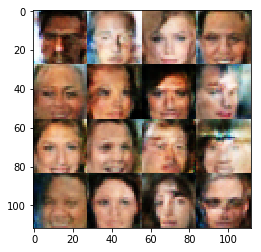

Epoch 0/1... Discriminator Loss: 0.4142... Generator Loss: 3.0751
Epoch 0/1... Discriminator Loss: 0.3850... Generator Loss: 3.3168
Epoch 0/1... Discriminator Loss: 0.4860... Generator Loss: 4.0772
Epoch 0/1... Discriminator Loss: 0.4815... Generator Loss: 3.0293
Epoch 0/1... Discriminator Loss: 0.4979... Generator Loss: 3.2221


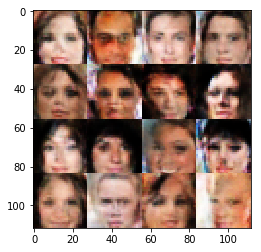

Epoch 0/1... Discriminator Loss: 0.5332... Generator Loss: 2.2795
Epoch 0/1... Discriminator Loss: 0.4874... Generator Loss: 3.0160


In [14]:
batch_size = 64
z_dim = 128
learning_rate = 0.0002    #Tried 0.001 previously, quality was not great.
beta1 = 0.5


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
epochs = 1

celeba_dataset = helper.Dataset('celeba', glob(os.path.join(data_dir, 'img_align_celeba/*.jpg')))
with tf.Graph().as_default():
    train(epochs, batch_size, z_dim, learning_rate, beta1, celeba_dataset.get_batches,
          celeba_dataset.shape, celeba_dataset.image_mode)

### Submitting This Project
When submitting this project, make sure to run all the cells before saving the notebook. Save the notebook file as "dlnd_face_generation.ipynb" and save it as a HTML file under "File" -> "Download as". Include the "helper.py" and "problem_unittests.py" files in your submission.